<a href="https://colab.research.google.com/github/movie112/INU-DILAB/blob/main/dacon/titanic/titanic_basic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [재난] 타이타닉: 누가 살아남았을까?   
- 참고: [blog_Titanic 생존자 예측 기본편 #3](https://blog.naver.com/fkdldjs60/221895882365)
- 데이터 시각화를 통해 어떤 사람의 생존율이 높은지 직관적으로 확인
- 상관관계 적은 열 제외


In [1]:
cd drive/MyDrive/data/titanic

/content/drive/MyDrive/data/titanic


## 시각화
#### 시각화 라이브러리 seaborn

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 시각화하여 데이터 분석
- seaborn의 그래프는 대부분 countplot, pointplot, barplot 등 plot임
- sns.countplot('data', '열'): 해당 열 각 값의 총개수


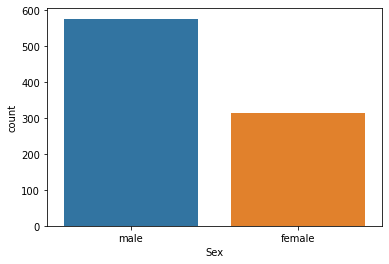

In [6]:
sns.countplot(data=train, x = 'Sex')

__남성이 여성보다 약 2배 많이 탑승__

#### 성별 생존자와 사망자 구분
- hue: 값을 어떤 기준으로 나눌지

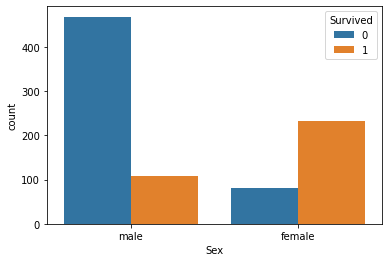

In [7]:
sns.countplot(data=train, x = 'Sex', hue="Survived")

__여성 생존자가 남성보다 약 2배 많음__   

> - 시각화를 하면 각 데이터가 어떤 의미를 가지고 있는지 파악 가능   
> - 성별 데이터를 시각화한 결과 여성의 생존율이 남성에 비해 높다와 같은 정보를 얻을 수 있다.
> - test data의 생존자를 예측할 때 여성이 더 많을 것이다라는 결과를 얻을 수 있다. 

#### 선착장(탑승위치) 시각화
#### 선착장에 몇 명이 탔는지

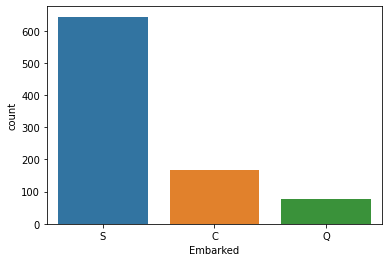

In [8]:
sns.countplot(data=train, x='Embarked')

#### 선착장별 생존자와 사망자 수
- sns.countplot(data=train, x='Embarked', hue='Survived)

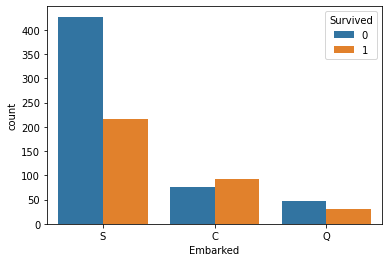

In [9]:
sns.countplot(data=train, x='Embarked', hue='Survived')

- __그래프를 보면 S에서 탑승한 사람이 많이 생존하기는 했으나 생존율은 33% 정도, C에서 탑승한 사람은 S에서 탑승한 사람에 비해 적으나 생존율이 50% 정도로 더 높다는 것 확인__   

- __그러면 선착장 데이터로는 이런 해석이 가능할 것이다. C에서 탑승하면 살 수 있는 확률이 더 높을 것이다.__   

- __countplot: 값의 종류가 적은 경우에는 충분하나 다양할 경우 다른 plot 이용 추천__


---
## 상관관계 파악
#### 상관관계
- 각 데이터가 다른 데이터와 얼마나 관련성이 있는가
- -1 ~ 1 범위의 소수점으로 표기
> - (절대값 기준)  
> - 매우 강한 상관관계: 0.7 ~ 1, 
> - 강한 상관관계: 0.3 ~ 0.7, 
> - 약한 상관관계: 0.1 ~ 0.3, 
> - 상관관계 없음: 0 ~ 0.1 


#### 상관관계 표
- .corr()
- 상관관계는 숫자형 데이터만 불러와서 성별과 선착장 데이터를 숫자형으로 변환하겠다.

In [5]:
train['Sex_encode'] = train['Sex'].replace('male', 0).replace('female', 1)
train['Sex_encode']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_encode, Length: 891, dtype: int64

In [6]:
test['Sex_encode'] = train['Sex'].replace('male', 0).replace('female', 1)
test['Sex_encode']

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    0
415    1
416    1
417    1
Name: Sex_encode, Length: 418, dtype: int64

In [7]:
train['Embarked_encode'] = train['Embarked'].replace('S', 0).replace('C', 1).replace('Q', 2)
test['Embarked_encode'] = test['Embarked'].replace('S', 0).replace('C', 1).replace('Q', 2)

In [8]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encode,Embarked_encode
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,-0.030555
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,0.108669
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.043835
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.012186
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.060606
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.079320
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,0.063462
Sex_encode,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,0.118593
Embarked_encode,-0.030555,0.108669,0.043835,0.012186,-0.060606,-0.079320,0.063462,0.118593,1.000000


__Survived를 기준으로 각 열과의 상관관계를 보자.__   
__PassengerId, Age, SibSp, Parch는 생존자를 예측하는 데 큰 도움이 되지 않는다는 결론__   

#### 숫자형리스트에서 상관관계가 없는 열을 제외


In [9]:
numeric = ['Pclass', 'Fare', 'Sex_encode', 'Embarked_encode']
numeric

['Pclass', 'Fare', 'Sex_encode', 'Embarked_encode']

## 모델링

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
x_train = train[numeric]
x_test = test[numeric]
y_train = train['Survived']

#### 결측값 처리

In [13]:
x_train['Embarked_encode'] = x_train['Embarked_encode'].fillna(0)
x_test['Fare'] = x_test['Fare'].fillna(x_test['Fare'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
y_test = model.predict(x_test)

In [16]:
submit = pd.read_csv('sample_submission.csv')
submit['Survived'] = y_test
submit.to_csv('final_result3.csv', index = False)